In [28]:
from pymavlink import mavutil

import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point, LineString

In [3]:
path_log01 = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_01'
path_log02 = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_02'

In [29]:
contenido01 = os.listdir(path_log01)
contenido02 = os.listdir(path_log02)
print('01 - ', len(contenido01))
print('02 - ', len(contenido02))

01 -  29
02 -  32


In [30]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    for i in lista_logs:
        log = path_log + '/' + i
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(i)
    #dict_lines = {'geos':list_geo, 'names':list_name}
    #gdf_line = gpd.GeoDataFrame(dict_lines, crs="EPSG:4326")
    #gdf_line_utm = gdf_line.to_crs(epsg=32720)
    return (list_geo, list_name)

In [61]:
lineas, names = leer_logs(contenido)

In [31]:
path_log = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_02/Los_Andes'
path_res = 'G:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - EQUIPO AVIACION UTEA/Trichogramma/2024/TLOGS/ALTA_02/Los_Andes'

In [32]:
contenido = os.listdir(path_log)
len(contenido)

14

In [33]:
contenido

['2024-07-30 07-47-35.tlog',
 '2024-07-30 16-44-11.tlog',
 '2024-07-30 17-50-19.tlog',
 '2024-07-30 17-55-21.tlog',
 '2024-07-30 18-03-03.tlog',
 '2024-07-30 18-04-02.tlog',
 '2024-07-30 18-08-20.tlog',
 '2024-07-30 18-23-44.tlog',
 '2024-07-30 19-03-52.tlog',
 '2024-07-30 20-20-38.tlog',
 '2024-07-30 22-17-43.tlog',
 '2024-07-31 00-14-49.tlog',
 '2024-07-31 00-15-37.tlog',
 '2024-07-31 11-18-27.tlog']

In [34]:
def leer_logs(lista_logs):
    list_geo = []
    list_name = []
    list_fecha = []
    list_hora = []
    for i in lista_logs:
        log = path_log + '/' + i
        
        name = i.split('.')[0]
        fecha = name.split(' ')[0]
        hora = name.split(' ')[1]
        
        mlog = mavutil.mavlink_connection(log)
        lats = []
        lons = []
        while True:
            msg = mlog.recv_match()
            if not msg:
                break
            # Ejemplo de procesamiento de mensaje
            if msg.get_type() == 'GLOBAL_POSITION_INT':
                lat = msg.lat / 1e7  # Latitud en grados
                lon = msg.lon / 1e7  # Longitud en grados
                lats.append(lat)
                lons.append(lon)

        coors = {'lat':lats, 'lon':lons}
        df = pd.DataFrame(coors)
        
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
        line = LineString(geometry)
        list_geo.append(line)
        list_name.append(name)
        list_fecha.append(fecha)
        list_hora.append(hora)
    #dict_lines = {'geos':list_geo, 'names':list_name}
    #gdf_line = gpd.GeoDataFrame(dict_lines, crs="EPSG:4326")
    #gdf_line_utm = gdf_line.to_crs(epsg=32720)
    return (list_geo, list_name, list_fecha, list_hora)

In [35]:
lineas, names, fecha, hora = leer_logs(contenido)

In [36]:
len(lineas)

14

In [37]:
len(names)

14

In [38]:
# Crear un GeoDataFrame con los LineStrings y sus nombres
gdf_lines = gpd.GeoDataFrame({'name': names, 'fecha': fecha, 'hora': hora, 'geometry': lineas}, crs="EPSG:4326")

In [39]:
gdf_lines

,name,fecha,hora,geometry
0,2024-07-30 07-47-35,2024-07-30,07-47-35,"LINESTRING (-63.17428 -17.07172, -63.17428 -17..."
1,2024-07-30 16-44-11,2024-07-30,16-44-11,"LINESTRING (0.00000 0.00000, 0.00000 0.00000, ..."
2,2024-07-30 17-50-19,2024-07-30,17-50-19,"LINESTRING (-63.18766 -17.29591, -63.18766 -17..."
3,2024-07-30 17-55-21,2024-07-30,17-55-21,"LINESTRING (-63.18767 -17.29591, -63.18767 -17..."
4,2024-07-30 18-03-03,2024-07-30,18-03-03,"LINESTRING (-63.18745 -17.29641, -63.18745 -17..."
5,2024-07-30 18-04-02,2024-07-30,18-04-02,"LINESTRING (-63.18755 -17.29654, -63.18755 -17..."
6,2024-07-30 18-08-20,2024-07-30,18-08-20,"LINESTRING (-63.18755 -17.29653, -63.18755 -17..."
7,2024-07-30 18-23-44,2024-07-30,18-23-44,"LINESTRING (-63.18755 -17.29655, -63.18755 -17..."
8,2024-07-30 19-03-52,2024-07-30,19-03-52,"LINESTRING (-63.18765 -17.29592, -63.18765 -17..."
9,2024-07-30 20-20-38,2024-07-30,20-20-38,"LINESTRING (-63.19202 -17.29304, -63.19202 -17..."


In [40]:
# Función para dividir y limpiar las líneas
def dividir_y_limpiar_linea(linea):
    puntos = list(linea.coords)
    nuevas_lineas = []
    nueva_linea = []
    
    for punto in puntos:
        if punto != (0, 0):
            nueva_linea.append(punto)
        else:
            if nueva_linea:
                nuevas_lineas.append(LineString(nueva_linea))
                nueva_linea = []
    
    if nueva_linea:
        nuevas_lineas.append(LineString(nueva_linea))
    
    return nuevas_lineas

In [41]:
# Crear una lista para las nuevas líneas y nombres
nuevas_lineas = []
nuevos_nombres = []
nuevos_fecha = []
nuevos_hora = []
for idx, row in gdf_lines.iterrows():
    lineas_divididas = dividir_y_limpiar_linea(row.geometry)
    for linea in lineas_divididas:
        nuevas_lineas.append(linea)
        nuevos_nombres.append(row['name'])
        nuevos_fecha.append(row['fecha'])
        nuevos_hora.append(row['hora'])

In [42]:
# Crear un nuevo GeoDataFrame con las nuevas líneas
gdf_lines = gpd.GeoDataFrame({'name': nuevos_nombres, 'fecha' : nuevos_fecha, 'hora' : nuevos_hora, 'geometry': nuevas_lineas}, crs="EPSG:4326")

In [43]:
# Función para contar la cantidad de coordenadas en una geometría de tipo LINESTRING
def contar_coordenadas(linea):
    return len(linea.coords)

In [44]:
gdf_lines['cant_coor'] = gdf_lines['geometry'].apply(contar_coordenadas)

In [45]:
gdf_lines

,name,fecha,hora,geometry,cant_coor
0,2024-07-30 07-47-35,2024-07-30,07-47-35,"LINESTRING (-63.17428 -17.07172, -63.17428 -17...",317
1,2024-07-30 16-44-11,2024-07-30,16-44-11,"LINESTRING (-63.18754 -17.29654, -63.18754 -17...",739
2,2024-07-30 16-44-11,2024-07-30,16-44-11,"LINESTRING (-63.18748 -17.29667, -63.18748 -17...",661
3,2024-07-30 17-50-19,2024-07-30,17-50-19,"LINESTRING (-63.18766 -17.29591, -63.18766 -17...",119
4,2024-07-30 17-55-21,2024-07-30,17-55-21,"LINESTRING (-63.18767 -17.29591, -63.18767 -17...",508
5,2024-07-30 18-03-03,2024-07-30,18-03-03,"LINESTRING (-63.18745 -17.29641, -63.18745 -17...",879
6,2024-07-30 18-03-03,2024-07-30,18-03-03,"LINESTRING (-63.18754 -17.29654, -63.18754 -17...",310
7,2024-07-30 18-04-02,2024-07-30,18-04-02,"LINESTRING (-63.18755 -17.29654, -63.18755 -17...",105
8,2024-07-30 18-08-20,2024-07-30,18-08-20,"LINESTRING (-63.18755 -17.29653, -63.18755 -17...",526
9,2024-07-30 18-23-44,2024-07-30,18-23-44,"LINESTRING (-63.18755 -17.29655, -63.18755 -17...",2241


<Axes: >

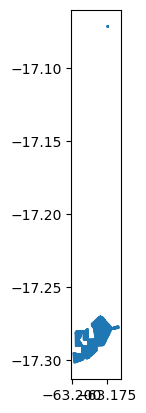

In [46]:
gdf_lines.plot()

In [47]:
gdf_lines_utm = gdf_lines.to_crs(epsg=32720)

In [48]:
output_path = path_res + '\\guayabochi-la-conquista.shp'
gdf_lines_utm.to_file(output_path)